# Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Reading the data

In [2]:
df = pd.read_pickle('EasyMoney_1.pkl', compression='zip')

In [3]:
df.head() # checking everything's ok

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,...,dif_short_term_deposit,meses_alta,new_client,productos_totales,ingresos_producto,suma_productos_totales,cliente_activo,cuenta,ahorro_inversion,financiacion
0,15891,2018-07-28,2018-07-28,KAT,1,desconocido,0,0,0,0,...,0,0.000000,0,1,0.0,1,1,0,0,0
1,15891,2018-08-28,2018-07-28,KAT,0,particulares,0,0,0,0,...,0,1.000000,0,0,0.0,1,1,-1,0,0
2,16063,2018-11-28,2018-11-19,KAT,1,desconocido,0,0,0,0,...,0,0.290323,1,0,0.0,0,0,0,0,0
3,16063,2018-12-28,2018-11-19,KAT,1,particulares,0,0,0,0,...,0,1.258065,0,0,0.0,0,0,0,0,0
4,16063,2019-01-28,2018-11-19,KAT,1,particulares,0,0,0,0,...,0,2.258065,0,0,0.0,0,0,0,0,0


We want to group the active customers in the last month (May 2019), so we select a subset of the sample.

In [4]:
df_mayo = df.query('(pk_partition=="2019-05-28")&(cliente_activo==1)')

In [5]:
df_mayo.drop(['cuenta', 'ahorro_inversion', 'financiacion'], axis=1, inplace=True)
# deleting to avoid confusion

/var/folders/v8/ttzsnn891fd42qm8ffd92scm0000gp/T/ipykernel_1923/3284134457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mayo.drop(['cuenta', 'ahorro_inversion', 'financiacion'], axis=1, inplace=True)


In [6]:
cuentas= ['debit_card','em_account_p','em_account_pp','em_acount','emc_account','payroll','payroll_account']

In [7]:
df_cuentas=df_mayo.melt(id_vars=['pk_cid'],
              value_vars=cuentas,
              var_name='Producto',
              value_name='Conteo')

In [8]:
df_cuentas=df_cuentas.groupby(['pk_cid'])['Conteo'].sum().reset_index()

In [9]:
df_cuentas.rename(columns={'Conteo':'cuentas_totales'}, inplace=True)

In [10]:
df_cuentas

,pk_cid,cuentas_totales
0,16203,1
1,16502,2
2,17457,2
3,17799,1
4,17970,3
...,...,...
344699,1553456,1
344700,1553541,1
344701,1553559,1
344702,1553565,1


## Total investment ('ahorro')

In [11]:
productos_ahorro=['funds','long_term_deposit','mortgage','pension_plan','securities','short_term_deposit']

In [12]:
df_ahorro=df_mayo.melt(id_vars='pk_cid',
                       value_vars=productos_ahorro,
                       var_name='Producto',
                       value_name='Conteo')

In [13]:
df_ahorro=df_ahorro.groupby(['pk_cid'])['Conteo'].sum().reset_index()

In [14]:
df_ahorro.rename(columns={'Conteo':'ahorro_total'}, inplace=True)

## Total financing ('financiación')

In [15]:
productos_financiacion = ['loans','credit_card']

In [16]:
df_financiacion=df_mayo.melt(id_vars='pk_cid',
                             value_vars=productos_financiacion,
                             var_name='Producto',
                             value_name='Conteo')

In [17]:
df_financiacion=df_financiacion.groupby(['pk_cid'])['Conteo'].sum().reset_index()

In [18]:
df_financiacion.rename(columns={'Conteo':'financiacion_total'}, inplace=True)

Merging all 3 cols as variables for df_mayo 

In [19]:
df_mayo=df_mayo.merge(df_cuentas,how='inner',on=['pk_cid'])\
    .merge(df_ahorro,how='inner',on=['pk_cid'])\
    .merge(df_financiacion,how='inner',on=['pk_cid'])

In [20]:
df_mayo.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,...,dif_short_term_deposit,meses_alta,new_client,productos_totales,ingresos_producto,suma_productos_totales,cliente_activo,cuentas_totales,ahorro_total,financiacion_total
0,16203,2019-05-28,2018-12-23,KAT,1,top,0,0,0,0,...,0,5.032258,0,1,0.0,5,1,1,0,0
1,16502,2019-05-28,2018-09-30,KHN,1,particulares,0,0,0,0,...,0,7.741935,0,2,0.0,13,1,2,0,0
2,17457,2019-05-28,2017-09-16,KAT,1,particulares,0,0,0,0,...,0,19.967742,0,3,10.0,38,1,2,1,0
3,17799,2019-05-28,2018-01-04,KAT,1,particulares,0,0,0,0,...,0,16.419355,0,1,0.0,17,1,1,0,0
4,17970,2019-05-28,2015-04-16,KAT,1,particulares,0,0,0,0,...,0,48.483871,0,5,0.0,73,1,3,2,0


Converting categorical variables to use in clustering

In [21]:
dummy_genero = pd.get_dummies(df_mayo['gender'],prefix='gender')
dummy_segment = pd.get_dummies(df_mayo['segment'],prefix='segment')
dummy_region_name = pd.get_dummies(df_mayo['region_name'],prefix='region')

In [22]:
datasets = [dummy_genero, dummy_segment, dummy_region_name]

for dataset in datasets:
    df_mayo = pd.concat([df_mayo, dataset], axis=1)

In [23]:
df_mayo.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,...,region_Teruel,region_Toledo,region_Valencia,region_Valladolid,region_Vizcaya,region_Zamora,region_Zaragoza,region_Ceuta,region_Melilla,region_Desconocido
0,16203,2019-05-28,2018-12-23,KAT,1,top,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,16502,2019-05-28,2018-09-30,KHN,1,particulares,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,17457,2019-05-28,2017-09-16,KAT,1,particulares,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,17799,2019-05-28,2018-01-04,KAT,1,particulares,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,17970,2019-05-28,2015-04-16,KAT,1,particulares,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


# Clustering

In [24]:
regiones = dummy_region_name.columns.to_list()

In [25]:
caract= ['meses_alta','salary','age', 'ingresos_producto', 
            'gender_H','gender_V','gender_unknown','segment_desconocido',
            'segment_particulares',	'segment_top','segment_universitario']
variables=caract+regiones+productos_financiacion+cuentas+productos_ahorro

In [26]:
for x in datasets:
    del x

In [27]:
valores_k=range(1,10)
inercias=[]

for k in valores_k:
    pipeline= Pipeline(steps=[('StandardScaler',StandardScaler()),
                          ('KMeans',KMeans(n_clusters=k, random_state=42))])
    pipeline.fit(df_mayo[variables])
    inercias.append(pipeline.named_steps['KMeans'].inertia_)

/anaconda3/envs/Nuclio/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/anaconda3/envs/Nuclio/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/anaconda3/envs/Nuclio/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/anaconda3/envs/Nuclio/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

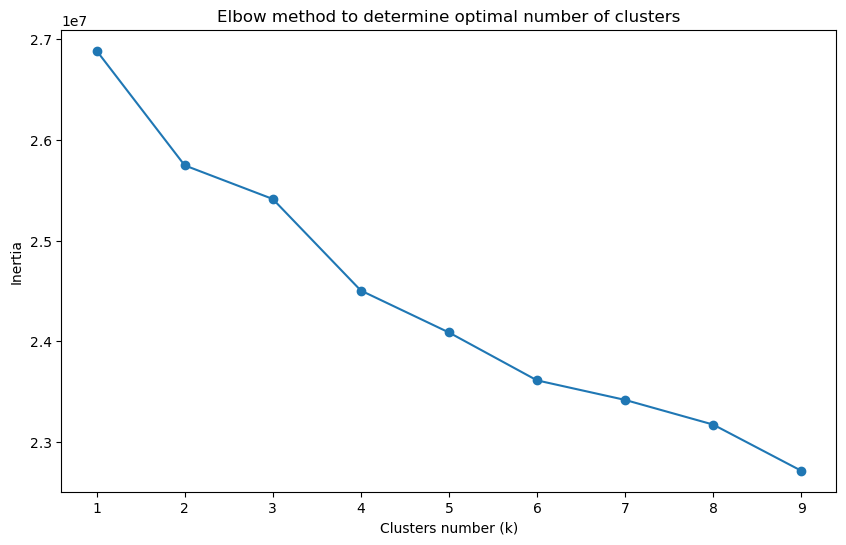

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(valores_k, inercias, marker='o')
plt.title('Elbow method to determine optimal number of clusters')
plt.xlabel('Clusters number (k)')
plt.ylabel('Inertia')
plt.show()

Although by the looks of it 2 clusters would be my 1st choice, business needs require for 5+ groups, therefore will select 5 since I dont think any more clusters will add significant differences.

In [29]:
k_optimo = 5

# Adding 'Cluster' col to df with optimal number of clusters
pipeline = Pipeline(steps=[
    ('StandardScaler', StandardScaler()),
    ('KMeans', KMeans(n_clusters=k_optimo, random_state=42))
])

pipeline.fit(df_mayo[variables])
df_mayo['Cluster'] = pipeline.predict(df_mayo[variables])

/anaconda3/envs/Nuclio/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [30]:
df_mayo[['pk_cid','Cluster']].to_csv('Clientes_clustering_completo3.csv')

In [31]:
df_mayo.to_csv('df_completo_cluster3.csv')

In [32]:
df_mayo[df_mayo.select_dtypes(bool).columns]=df_mayo.select_dtypes(bool).astype('Int64')

In [33]:
caract_cluster=df_mayo.select_dtypes(include=np.number).groupby('Cluster').agg(np.mean)

In [34]:
caract_cluster.T

Cluster,0,1,2,3,4
pk_cid,1303674.753222,1252039.848105,1282337.407879,1254037.258206,1258306.595524
active_customer,0.362637,0.315629,0.760194,0.997981,0.340132
short_term_deposit,0.0,0.0,0.00002,0.0,0.0
loans,0.0,0.000008,0.000079,0.000808,0.000073
mortgage,0.0,0.0,0.000069,0.000923,0.0
...,...,...,...,...,...
region_Zamora,0.0,0.007178,0.003827,0.002884,0.006401
region_Zaragoza,0.0,0.027066,0.018855,0.014883,0.030491
region_Ceuta,0.0,0.000204,0.000942,0.000635,0.000322
region_Melilla,0.0,0.000293,0.000674,0.000461,0.000342


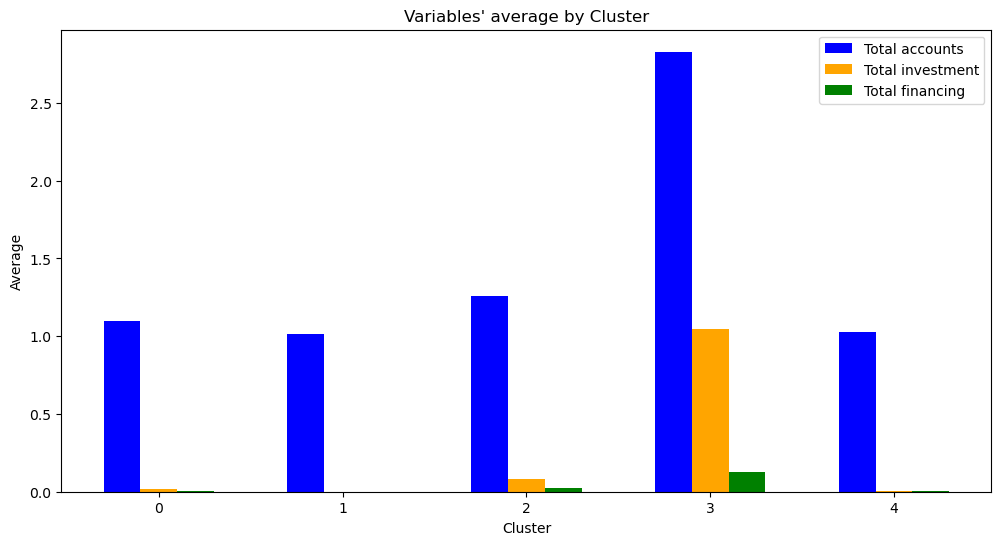

In [35]:
# Sample data
clusters = caract_cluster.index
cuentas_totales = caract_cluster['cuentas_totales']
ahorro_total = caract_cluster['ahorro_total']
financiacion_total = caract_cluster['financiacion_total']

colors = ['blue', 'orange', 'green']

width = 0.2  
x = np.arange(len(clusters))

plt.figure(figsize=(12, 6))

plt.bar(x - width, cuentas_totales, width, label='Total accounts', color=colors[0])
plt.bar(x, ahorro_total, width, label='Total investment', color=colors[1])
plt.bar(x + width, financiacion_total, width, label='Total financing', color=colors[2])

plt.title("Variables' average by Cluster")
plt.xlabel('Cluster')
plt.ylabel('Average')
plt.xticks(x, clusters)
plt.legend()
plt.show()

In [36]:
grupo_0=df_mayo.query('Cluster==0')
grupo_1=df_mayo.query('Cluster==1')
grupo_2=df_mayo.query('Cluster==2')
grupo_3=df_mayo.query('Cluster==3')
grupo_3=df_mayo.query('Cluster==4')

In [37]:
def productos_cluster(grupo, numero):
    datos_grafico=grupo.describe().T.iloc[5:19,1]
    productos=datos_grafico.index
    valores=datos_grafico.values

    plt.figure(figsize=(5,4))
    plt.bar(productos, valores)
    plt.xlabel('products')
    plt.ylabel('average')
    plt.title(f"EasyMoney products' average for group {numero}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

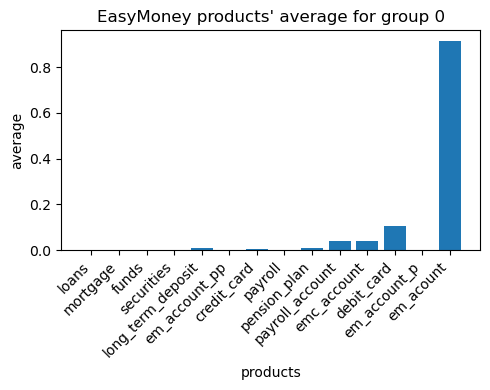

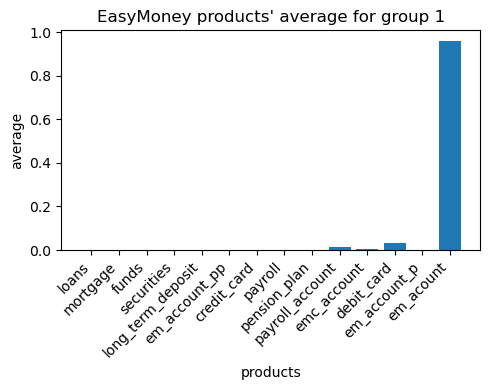

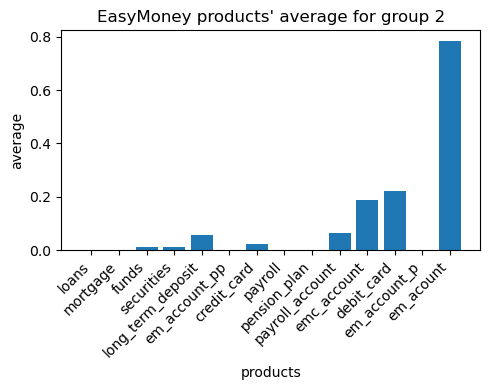

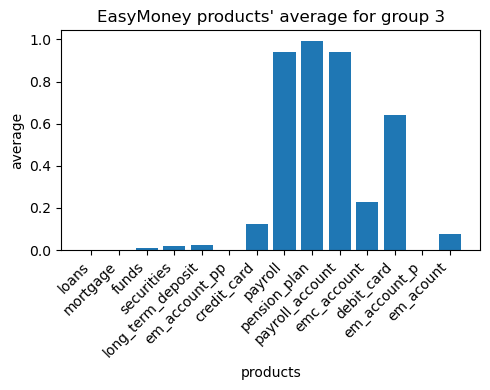

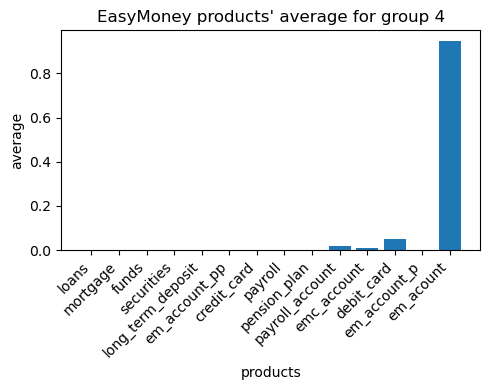

In [38]:
for i in range(5):
    nombre_cluster=f'grupo_{i}'
    grupo = df_mayo.query(f'Cluster == {i}')
    productos_cluster(grupo, str(i))

In [39]:
# getting groups 0-5 date + concatenating in one DataFrame
lista_grupos = [df_mayo.query(f'Cluster == {i}').describe().T.iloc[5:19, 1] for i in range(5)]
df_grupos_concatenados = pd.concat(lista_grupos, axis=1)

# renaming cols
df_grupos_concatenados.columns = [f'group_{i}' for i in range(5)]

df_grupos_concatenados.to_csv('productos_por_cluster.csv')
# statistics summary
print(df_grupos_concatenados)

                    group_0   group_1   group_2   group_3   group_4
loans                   0.0  0.000008  0.000079  0.000808  0.000073
mortgage                0.0       0.0  0.000069  0.000923       0.0
funds              0.001628  0.000212  0.010716  0.008941  0.000425
securities         0.001899  0.000212  0.013066  0.018114  0.001214
long_term_deposit  0.006919  0.000562  0.054871  0.023132  0.000757
em_account_pp           0.0       0.0       0.0       0.0       0.0
credit_card        0.006376  0.001075  0.023138  0.123277  0.001567
payroll            0.001899       0.0       0.0   0.94139       0.0
pension_plan        0.00814  0.000024  0.000565  0.993828  0.000052
payroll_account    0.037444  0.015081  0.063198  0.940121  0.017948
emc_account        0.041243  0.006054  0.186829  0.228786  0.009254
debit_card         0.102971  0.034423  0.221546  0.642515  0.049705
em_account_p            0.0       0.0   0.00002       0.0       0.0
em_acount          0.914666  0.960142   0.78463 

# Conclusion
## I. Cluster 0 - Conservative Canarians:
- This group has an average age of 29 years and low salaries compared to other groups.
- Majority are university graduates.
- Balanced gender ratio.
- Primarily reside in Las Palmas.
- Regarding accounts, most clients have multiple current accounts, some have debit cards, while payroll and crypto accounts are less common. As for savings products, most clients have little presence in this type of product. Regarding financing, some clients have credit cards, but their presence is limited compared to other products.
In this group, clients tend to maintain a conservative distribution in their financial products, with a preference for current accounts over other products. This suggests a more cautious approach to financial management, with less participation in investment or financing products.

## II. Cluster 1 - Moderate University Students:
- With an average age of 23 years and intermediate salaries, this group tends to be younger and have moderate incomes.
- Majority are university graduates, predominantly women.
- Primarily reside in Barcelona, Madrid, and Valencia.
- Regarding accounts, most clients have multiple current accounts, and some have debit cards. As for savings products, most clients have little presence in this type of product. Regarding financing, very few have credit cards.
Despite having moderate incomes, this group shows limited participation in financing products, such as credit cards. This may indicate a more cautious approach to debt and a more moderate and responsible financial management.

## III. Cluster 2 - Senior Investors:
- With an average age of 43 years and intermediate salaries, this group tends to be older and have stable incomes.
- Majority are individuals with a balanced gender ratio.
- Primarily reside in Madrid and Barcelona.
- Regarding accounts, most clients have multiple current accounts, many debit cards and crypto accounts, and some payroll accounts. In terms of savings products, long-term deposits stand out. Regarding financing, many clients have credit cards.
With a greater propensity to invest in long-term deposits and a significant presence in credit cards, this group shows a more proactive attitude towards financial management and a greater willingness to take moderate risks in their investments and financing.

## IV. Cluster 3 - Value Segment:
- With an average age of 37 years and high salaries, this group has significantly higher incomes compared to other groups.
- Majority are individuals with a balanced gender ratio.
- Primarily reside in Madrid and Barcelona.
- Regarding accounts, almost all clients have payroll accounts and direct debits, as well as many debit cards, some crypto accounts, and few current accounts. As for savings products, almost all have pension plans, while some also have funds, securities, and long-term deposits, albeit to a lesser extent. Regarding financing, almost all have credit cards and some have loans.
This group stands out for its active participation in a variety of financial products, including pension plans, funds, and securities. Their high participation in credit cards and loans suggests a more proactive attitude towards financing and a greater willingness to take financial risks.

## V. Cluster 4 - Young Individuals with Opportunities:
- With an average age of 24 years and high salaries, this group tends to be younger but with high incomes.
- Majority are university graduates, predominantly men.
- Primarily reside in Madrid and Barcelona.
- Regarding accounts, most clients have multiple current accounts, and some have debit cards and payroll accounts. As for savings products, most clients have little presence in this type of product. Regarding financing, very few have credit cards.
Despite having high incomes, this group shows limited participation in financing products, such as credit cards. This may indicate a more conservative approach to financial management, with a preference for liquidity and a lower willingness to take on debt or financial risks.